In [ ]:
import numpy as np 
import pandas as pd
import time
import os
import matplotlib.pyplot as plt 
from scipy import stats 
from scipy.stats import norm, skew
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/ColabNotebooks/

/content/drive/MyDrive/ColabNotebooks


In [ ]:
def read_file(filename, measure):
    if not os.path.isfile(filename):
        raise FileNotFoundError('File does not exist!! '+ filename)
    
    data = [] 
    with open(filename ,'r', encoding='utf-16') as f:
        contents = f.read()
        
        if measure == 'time': 
            return [float(c) for c in contents.split(',') if len(c) != 0]

        print(filename, len(contents.split(';')[1]))

        data = [] 
        for C in contents.split(';'):
            if len(C) != 0:
                data.append(np.mean([float(c) for c in C.split(',') if len(c) != 0]))

    return data 


def constructDataFrame(workingDir):
  f_timetable = os.path.join(workingDir,"res_timetable.txt")
  f_stress = os.path.join(workingDir,"res_stress.txt")
  f_strain = os.path.join(workingDir,"res_strain.txt")
  f_disp = os.path.join(workingDir,"res_displacement.txt")
  f_fatigue = os.path.join(workingDir,"res_fatigueLife.txt")

  t      = read_file(f_timetable, 'time')
  stress = read_file(f_stress, 'stress')
  strain = read_file(f_strain, 'strain')
  disp   = read_file(f_disp, 'disp')
  fatigueLife = read_file(f_fatigue,'fatigue')
          
  column = ['time(s)', 'stress(Pa)', 'strain', 'displacement(mm)', 'dSigma','dEpsilon','fatigueLife']
  dSigma = list(np.insert(np.diff(stress), 0, 0))
  dEpsilon = list(np.insert(np.diff(strain), 0, 0))

  df = pd.DataFrame(np.concatenate([[t],[stress],[strain],[disp],[dSigma],[dEpsilon],[fatigueLife]]).T, columns=column)

  #display(df.head()) 
  #display(df.tail())

  return df 


In [ ]:
#df_test = constructDataFrame(os.path.join(os.getcwd(), "data/cylinderTest/2MN/set1"))

In [ ]:
expSetup = "data/indirectTensile"

workingDir_2MN = os.path.join(os.getcwd(), "data/cylinderTest/2MN/set1")
workingDir_3MN = os.path.join(os.getcwd(), "data/cylinderTest/3MN")
workingDir_5MN = os.path.join(os.getcwd(), "data/cylinderTest/5MN")
workingDir_7MN = os.path.join(os.getcwd(), "data/cylinderTest/7MN")

df2 = constructDataFrame(workingDir_2MN)
df3 = constructDataFrame(workingDir_3MN)
df5 = constructDataFrame(workingDir_5MN)
df7 = constructDataFrame(workingDir_7MN)

/content/drive/MyDrive/ColabNotebooks/data/cylinderTest/2MN/set1/res_stress.txt 12530
/content/drive/MyDrive/ColabNotebooks/data/cylinderTest/2MN/set1/res_strain.txt 8662
/content/drive/MyDrive/ColabNotebooks/data/cylinderTest/2MN/set1/res_displacement.txt 17759
/content/drive/MyDrive/ColabNotebooks/data/cylinderTest/2MN/set1/res_fatigueLife.txt 11376
/content/drive/MyDrive/ColabNotebooks/data/cylinderTest/3MN/res_stress.txt 11376
/content/drive/MyDrive/ColabNotebooks/data/cylinderTest/3MN/res_strain.txt 8665
/content/drive/MyDrive/ColabNotebooks/data/cylinderTest/3MN/res_displacement.txt 17794
/content/drive/MyDrive/ColabNotebooks/data/cylinderTest/3MN/res_fatigueLife.txt 11376
/content/drive/MyDrive/ColabNotebooks/data/cylinderTest/5MN/res_stress.txt 11376
/content/drive/MyDrive/ColabNotebooks/data/cylinderTest/5MN/res_strain.txt 8664
/content/drive/MyDrive/ColabNotebooks/data/cylinderTest/5MN/res_displacement.txt 17769
/content/drive/MyDrive/ColabNotebooks/data/cylinderTest/5MN/res_

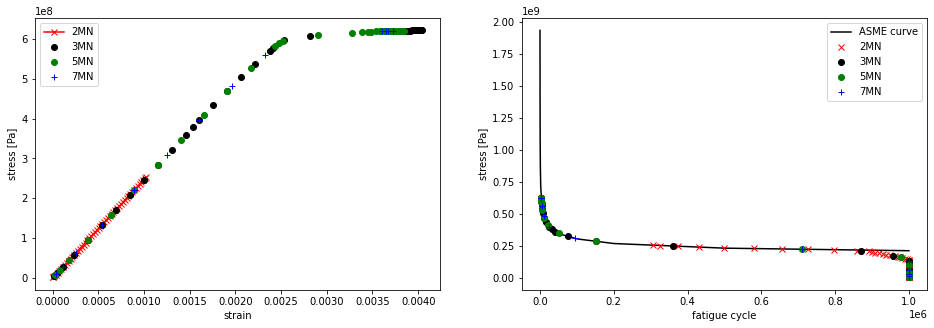

In [ ]:
with open("data/cylinderTest/sn_curve.csv" ,'r') as f:
    contents = f.read()
#    t = [float(c) for c in contents.split(',') if len(c) != 0]
sn_alloy = []
for c in contents.split('\t'):
    for el in c.split('\n'): 
        if len(el) != 0:
            sn_alloy.append(float(el))

sn_alloy = np.array(sn_alloy).reshape((-1,2))

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(df2['strain'], df2['stress(Pa)'], 'r-x', label='2MN')
plt.plot(df3['strain'], df3['stress(Pa)'], 'ko', label='3MN')
plt.plot(df5['strain'], df5['stress(Pa)'], 'go', label='5MN')
plt.plot(df7['strain'], df7['stress(Pa)'], 'b+', label='7MN')
#plt.plot(X,yfit, 'k-.')
plt.xlabel("strain")
plt.ylabel("stress [Pa]")
plt.legend()

plt.subplot(1,2,2)
plt.plot(sn_alloy[:,0],sn_alloy[:,1],'k-', label='ASME curve')
plt.plot(df2['fatigueLife'], df2['stress(Pa)'], 'rx', label='2MN')
plt.plot(df3['fatigueLife'], df3['stress(Pa)'], 'ko', label='3MN')
plt.plot(df5['fatigueLife'], df5['stress(Pa)'], 'go', label='5MN')
plt.plot(df7['fatigueLife'], df7['stress(Pa)'], 'b+', label='7MN')
plt.xlabel("fatigue cycle")
plt.ylabel("stress [Pa]")
plt.legend()


In [ ]:
df2.columns

Index(['time(s)', 'stress(Pa)', 'strain', 'displacement(mm)', 'dSigma',
       'dEpsilon', 'fatigueLife'],
      dtype='object')

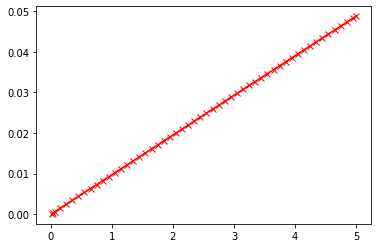

In [ ]:
plt.plot(df2['time(s)'], df2['displacement(mm)'], 'r-x')

In [ ]:
for i, val in enumerate(df['fatigueLife']): 
    if val > 0.8e+6: 
        print(i, val)

(135, 8)

after cutoff minimal stresses  (74, 9)


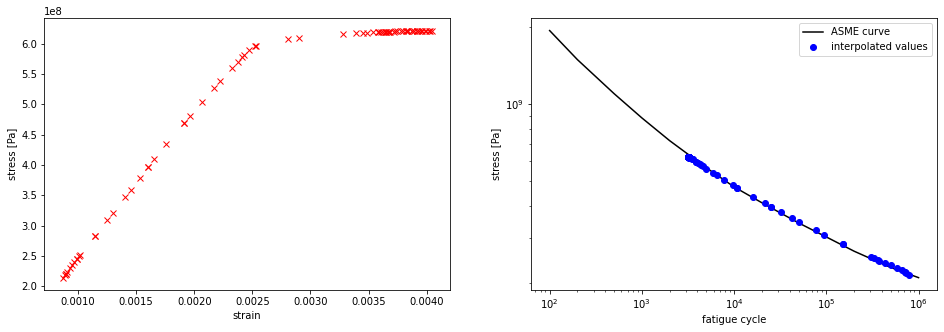

In [ ]:
df = pd.DataFrame()
df = df.append(df2)
df = df.append(df3)
df = df.append(df5)
df = df.append(df7)

df = df.reset_index()
display(df.shape)

ind_drop = []

for i, el in enumerate(df.fatigueLife):
    if el > 0.8e+6: 
      df.drop(index=i, inplace=True)

df = df.reset_index()
print("after cutoff minimal stresses ", df.shape)

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(df['strain'], df['stress(Pa)'], 'rx')
#plt.plot(X,yfit, 'k-.')
plt.xlabel("strain")
plt.ylabel("stress [Pa]")

plt.subplot(1,2,2)
plt.loglog(sn_alloy[:,0],sn_alloy[:,1],'k-', label='ASME curve')
plt.plot(df['fatigueLife'], df['stress(Pa)'], 'bo', label='interpolated values')
plt.xlabel("fatigue cycle")
plt.ylabel("stress [Pa]")
plt.legend()


In [ ]:
X = df[['stress(Pa)', 'strain','displacement(mm)']]
y = df.fatigueLife

X, y

(      stress(Pa)    strain  displacement(mm)
 0   2.145269e+08  0.000868          0.041420
 1   2.195723e+08  0.000888          0.042393
 2   2.246177e+08  0.000909          0.043366
 3   2.296630e+08  0.000929          0.044339
 4   2.347082e+08  0.000949          0.045311
 ..           ...       ...               ...
 69  6.192601e+08  0.003610          0.154474
 70  6.195964e+08  0.003650          0.155852
 71  6.196277e+08  0.003653          0.155965
 72  6.197786e+08  0.003673          0.156645
 73  6.201148e+08  0.003721          0.158292
 
 [74 rows x 3 columns], 0     797194.995879
 1     727756.175893
 2     655536.442278
 3     581034.474072
 4     499793.684466
           ...      
 69      3248.224033
 70      3237.247065
 71      3236.378489
 72      3231.221319
 73      3219.226728
 Name: fatigueLife, Length: 74, dtype: float64)

In [ ]:
# # Plotting results 
# plt.figure(figsize=(10,10))

# plt.subplot(3,2,1)
# plt.plot(t,stress,'x-')
# plt.xlabel("time [s]")
# plt.ylabel("stress [Pa]")

# plt.subplot(3,2,2)
# plt.plot(strain, stress, 'b-x')
# plt.xlabel("strain")
# plt.ylabel("stress [Pa]")

# plt.subplot(3,2,3)
# plt.plot(t, disp, '-x')
# plt.xlabel("t [s]")
# plt.ylabel("displacement [mm]")            

#plotting S-N curve of reference alloy s

In [ ]:
# linear fit on the elastic regime, giving Young's modulus 

# from sklearn.linear_model import LinearRegression

# X = np.expand_dims(np.array(xLinear), axis=1)
# y = np.expand_dims(np.array(yLinear), axis=1)
# reg = LinearRegression().fit(X,y)
# reg.score(X,y)
# print(reg.coef_, reg.intercept_)

# yfit = reg.coef_*X + reg.intercept_

# plt.scatter(xLinear, yLinear)
# plt.plot(X,yfit, 'k')

In [ ]:
df_short = df[['stress(Pa)', 'strain','displacement(mm)','fatigueLife']].copy()

# Regression models

(array([12.,  2.,  2.,  2.,  4.,  1.,  3.,  3.,  3., 42.]),
 array([2.14526864e+08, 2.55245680e+08, 2.95964495e+08, 3.36683310e+08,
        3.77402125e+08, 4.18120940e+08, 4.58839755e+08, 4.99558570e+08,
        5.40277385e+08, 5.80996200e+08, 6.21715015e+08]),
 <a list of 10 Patch objects>)

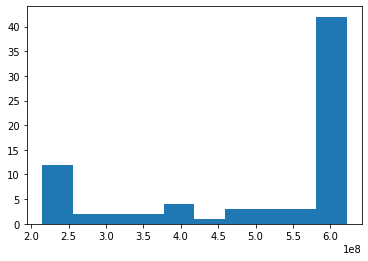

In [ ]:
plt.hist(df['stress(Pa)'])

In [ ]:
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)
print(df.columns)

(74, 3) (74,)
Index(['level_0', 'index', 'time(s)', 'stress(Pa)', 'strain',
       'displacement(mm)', 'dSigma', 'dEpsilon', 'fatigueLife'],
      dtype='object')


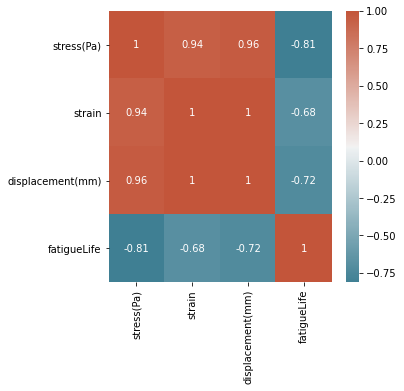

In [ ]:
import seaborn as sns

corr = df_short.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr,xticklabels=corr.columns, 
            yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import tensorflow as tf 
from tensorflow.keras import regularizers
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def SingleVariatePolynomialRegression(_X,_Y):
    
    plt.scatter(_X,_Y)

    nb_degree = 4

    polynomial_features = PolynomialFeatures(degree = nb_degree)

    X_TRANSF = polynomial_features.fit_transform(X)

    model = LinearRegression()
    model.fit(X_TRANSF, _Y)

    Y_NEW = model.predict(X_TRANSF)
    rmse = np.sqrt(mean_squared_error(_Y, Y_NEW))
    r2 = r2_score(_Y, Y_NEW)

    print('RMSE: ', rmse)
    print('R2: ', r2)

    x_new_min = min(_X)
    x_new_max = max(_X)

    X_NEW = np.linspace(x_new_min, x_new_max, 100)

    X_NEW_TRANSF = polynomial_features.fit_transform(X_NEW)

    Y_NEW = model.predict(X_NEW_TRANSF)

    plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)

    plt.grid()
    plt.xlim(x_new_min,x_new_max)

    title = 'Degree = {}; RMSE = {}; R2 = {}'.format(nb_degree, round(rmse,2), round(r2,2))

    plt.title("Polynomial Linear Regression using scikit-learn and python 3 \n " + title,
              fontsize=10)
    plt.xlabel('x')
    plt.ylabel('y')

    #plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
    plt.show()

RMSE:  0.013824121478114229
R2:  0.9999478925958251


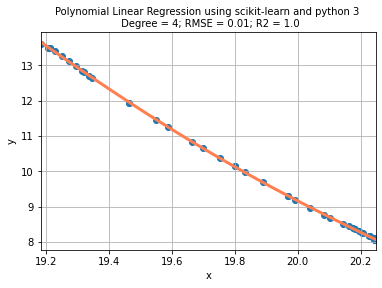

In [ ]:
X = np.expand_dims(np.log1p(df_short['stress(Pa)'].values),axis=1)
Y = np.expand_dims(np.log1p(df_short.fatigueLife.values),axis=1)

#plt.figure(figsize=(15,5))
#plt.subplot(3,1,1)
SingleVariatePolynomialRegression(X, Y)

# plt.subplot(3,1,2)
# SingleVariatePolynomialRegression(X, Y)

# plt.subplot(3,1,3)
# SingleVariatePolynomialRegression(X, Y)


In [ ]:
Xmul = np.log1p(df_short.values)
#Y = np.expand_dims(np.log1p(df_short.fatigueLife.values),axis=1)
print(Xmul.shape)

(74, 4)


RMSE:  0.013824121478114229
R2:  0.9999478925958251


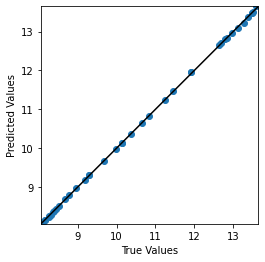

In [ ]:
# multivariate polynomial regression 

polynomial_features = PolynomialFeatures(degree = 4)

X_TRANSF = polynomial_features.fit_transform(X)

model = LinearRegression()

model.fit(X_TRANSF, Y)

Y_NEW = model.predict(X_TRANSF)

rmse = np.sqrt(mean_squared_error(Y, Y_NEW))
r2 = r2_score(Y, Y_NEW)

print('RMSE: ', rmse)
print('R2: ', r2)

plt.scatter(Y, Y_NEW)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
Max = max([np.max(Y), np.max(Y_NEW)]) 
Min = min([np.min(Y), np.min(Y_NEW)])
lims = [Min, Max]
plt.xlim(lims)
plt.ylim(lims)
plt.gca().set_aspect('equal', adjustable='box')
_ = plt.plot(lims, lims, 'k')

In [ ]:
def evaluations(y_test, y_pred):
    corr, _ = pearsonr(y_test, y_pred)

    EvalMetrics = np.array((corr, 
                            r2_score(y_test, y_pred), 
                            mean_absolute_error(y_test, y_pred),
                            np.sqrt(mean_squared_error(y_test, y_pred))))

    metric_name = ['R', 'R2', 'MAE', 'RMSE']
    df_EvalMetrics = pd.DataFrame(data=EvalMetrics).T
    df_EvalMetrics.columns = metric_name

    return df_EvalMetrics

def ScatterPlot(ytest,ypred):
    plt.scatter(ytest, ypred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    lims = [np.min([ypred, ytest]), np.max([ypred, ytest])]
    plt.xlim(lims)
    plt.ylim(lims)
    plt.gca().set_aspect('equal', adjustable='box')
    _ = plt.plot(lims, lims)


In [ ]:
print(Xmul.shape, Y.shape)

X_train, X_test, y_train, y_test = train_test_split(Xmul, Y, test_size=0.25, random_state=0)

(74, 4) (74, 1)


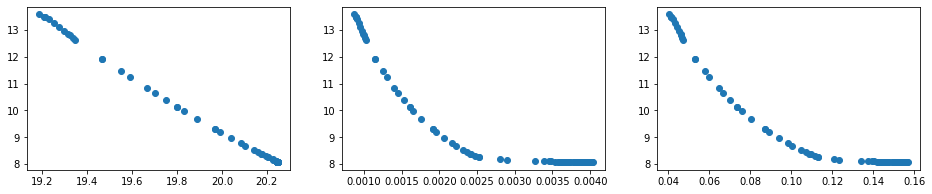

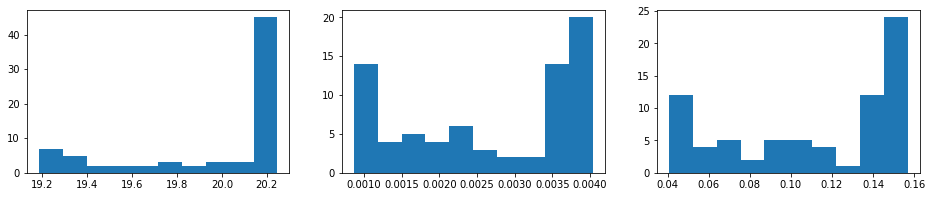

In [ ]:
def plotOverview(_X, _Y):
    plt.figure(figsize=(16,3))
    plt.subplot(1,3,1), plt.scatter(_X[:,0], _Y)
    plt.subplot(1,3,2), plt.scatter(_X[:,1], _Y)
    plt.subplot(1,3,3), plt.scatter(_X[:,2], _Y)

    plt.figure(figsize=(16,3))
    plt.subplot(1,3,1), plt.hist(_X[:,0])
    plt.subplot(1,3,2), plt.hist(_X[:,1])
    plt.subplot(1,3,3), plt.hist(_X[:,2])

plotOverview(Xmul, Y)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 3         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


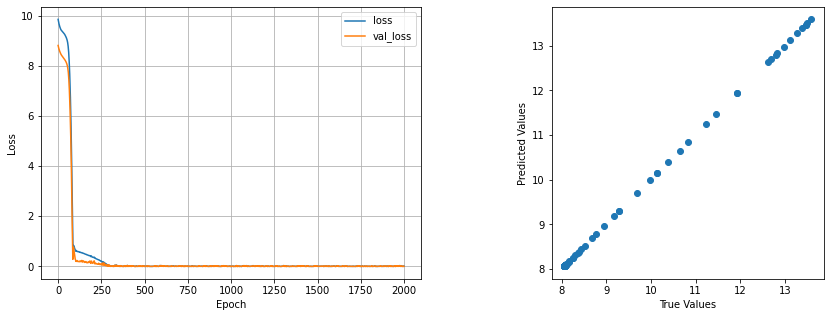

In [ ]:
def compile_and_fit(model, _epochs, _verbosity):           
    model.compile(optimizer=Adam(lr=1e-3), loss='mean_absolute_error')
    
    history = model.fit(Xmul, Y, 
                        validation_split = 0.1,
                        epochs=_epochs, 
                        verbose=_verbosity)
    
    return history

def plot_results(model, history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    y_pred = model.predict(Xmul)
    y_pred_lin = [v[0] for v in y_pred]

    plt.subplot(1,2,2)
    plt.scatter(Y, y_pred_lin)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    # lims = [np.min([y_pred, Y]), np.max([y_pred, Y])]
    # plt.xlim(lims)
    # plt.ylim(lims)
    plt.gca().set_aspect('equal', adjustable='box')
    #_ = plt.plot(lims, lims, 'k')
    
    return y_pred_lin

Kernel_initializer = 'lecun_normal'
Bias_initializer = 'random_uniform'

model = tf.keras.Sequential([
    Dense(8, input_dim=(Xmul.shape[1]), 
             activation='relu', kernel_initializer=Kernel_initializer, bias_initializer=Bias_initializer), 
    Dense(4, activation='relu', kernel_initializer=Kernel_initializer, bias_initializer=Bias_initializer), 
    Dense(2, activation='relu', kernel_initializer=Kernel_initializer, bias_initializer=Bias_initializer), 
    Dense(1, kernel_initializer=Kernel_initializer, bias_initializer=Bias_initializer)
])

model.summary()

history = compile_and_fit(model, 2000, 0)
y_pred_lin = plot_results(model, history)

# evaluations(Y, y_pred_ANN)